<a href="https://colab.research.google.com/github/Ian-Sinclair/Computer-Vision-Histogram-Matching/blob/main/ENCE_4620_1_Project_2_Ian_Sinclair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import PIL as pl
import cv2
from statistics import mean
import math

from scipy.spatial import distance as dist

import numpy as np
import argparse
import glob



from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Saving Image Function

Saves an input image to the input file.

In [ ]:
def save_toFile( image, filename ) :
  pass

# RGB to Greyscale Function (luminosity method)

Function to convert a colored image to greyscale, intensity value taken by respecting human perseption of each RGB value differently. Specifically, preforming weighted averaging.
\begin{align*}
  I =  0.299R + 0.587G + 0.114B
\end{align*}

https://www.dynamsoft.com/blog/insights/image-processing/image-processing-101-color-space-conversion/#:~:text=The%20Average%20method%20takes%20the,B%20is%20greater%20than%20255.


---



In [ ]:
from traitlets.traitlets import List
def RGB_to_Greyscale( image ) :
  temp = image.copy()
  grey = np.zeros(( len(temp), len(temp[0]) ), dtype = int )

  for i in range(0 , len( image ) ) :
    for j in range(0 , len( image[i] ) ) :
      Filter =  0.299*temp[i][j][0] + 0.587*temp[i][j][1] + 0.114*temp[i][j][2]
      grey[i][j] = int( Filter )

  return grey

# Generating Histogram Function

Function, given a grayscale image, will generate the histogram of that image.

In [ ]:
def generate_histogram( image ) :
  temp = image.copy()
  hist = []

  #Initialize an emply list on [0,255]
  for i in range( 0 , 256 ) :
    hist += [0]

  #Fill list with histogram values
  for i in range( 0 , len( image ) ) :
    for j in range( 0 , len( image[i] ) ) :
      intensity = int( image[i][j] )
      hist[intensity] += 1

  return hist


# Normalize Histogram

Given a histogram on the number of pixels r returns a normalized to [0,1] copy.

Is equivalent to the probability that any pixel, x will have a particular intensit value i.
\begin{align*}
p_x(i) = p(x=i) = \frac{n_i}{n}
\end{align*}
Where $n_i$ is the number of pixels with intensity value $i$ and $n$ is the total number of pixels.


In [ ]:
def normalize_histogram( histogram ) :
  temp = histogram.copy()
  r = sum( temp )
  for i in range( 0 , len( temp ) ) :
    temp[i] = temp[i]/r
  
  return temp

# Cumulative Distributive Function (CDF) Function

Given a histogram, generates the CDF
If the histogram is normalized, this corresponds to the probability that any pixel has intensity less than that of $i$.
\begin{align*}
cdf_x = \sum_{j=0}^i p(x=j)
\end{align*}

In [ ]:
def generate_CDF( histogram ) :
  CDF = np.zeros( [256] )

  CDF[0] = histogram[0]

  for i in range( 1 , len( histogram ) ) :
    CDF[i] = CDF[i-1] + histogram[i]
  
  return CDF

# Histogram Equalization

Given a CDF and an image returns a modified image.

In [ ]:
def histogram_equalization( image, CDF ) :
  temp_image = image.copy()
  equ_image = np.zeros(image.shape)

  for i in range( 0 , len( temp_image ) ) :
    for j in range( 0 , len( temp_image[i] ) ) :  
      intensity = int( temp_image[i][j] )
      equ_image[i][j] = CDF[intensity] * 255
  
  return equ_image



# Histogram Matching

Given two normalized histograms and a target histogram, returns a representative of the first histogram matched to the target.

In [ ]:
def histogram_matching( image, histogram, target_histogram ) :
  A_image = image.copy()
  A_histogram = histogram.copy()
  target = target_histogram.copy()

  out_image = np.zeros(A_image.shape)

  cdf_A = generate_CDF( A_histogram )
  cdf_B = generate_CDF( target )

  for i in range( 0 , len( A_image ) ) :
    equalized_intensity = 0

    for j in range( 0 , len( A_image[i] ) ) :
      intensity = A_image[i][j]
      equalized_intensity = cdf_A[intensity]

      equiv_equal_intensity = 0

      for k in range( 0 , len( cdf_B ) ) :
        if cdf_B[k] > equalized_intensity :
          if abs( cdf_B[k] - equalized_intensity ) >= abs( cdf_B[k-1] - equalized_intensity ) :
            out_image[i][j] = int( k-1 )
          else :
            out_image[i][j] = int( k )
          
          break

  return out_image



# Reading Images

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Set 1

In [ ]:
Set_1_raw_images = []

image_path = 'drive/MyDrive/forest.tif'
Set_1_raw_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/circuit.tif'
Set_1_raw_images.append( mp.imread(image_path) )


Set_1_raw_test_images = []
image_path = 'drive/MyDrive/62c7e6fdb08d4a45940a7b535d10133a.jpg'
Set_1_raw_test_images.append( mp.imread(image_path) )


Set 2

In [ ]:
Set_2_raw_images = []
Color_set_raw_images = []

image_path = 'drive/MyDrive/20220206_113949.jpg'
Set_2_raw_images.append( mp.imread(image_path) )

# This one for colored images
image_path = 'drive/MyDrive/20220206_160744.jpg'
Color_set_raw_images.append( mp.imread(image_path) )

#image_path = 'drive/MyDrive/20220206_114933.jpg'
#Set_2_raw_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/20220206_115334.jpg'
Set_2_raw_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/20220305_192120.jpg'
Color_set_raw_images.append( mp.imread(image_path) )

Set_2_raw_test_images = []
Color_set_raw_test_images = []

image_path = 'drive/MyDrive/25462804434_c1790274fb_b.jpg'
Set_2_raw_test_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/3225124.jpg'
Color_set_raw_test_images.append( mp.imread(image_path) )


# Displaying Raw Images

Set 1

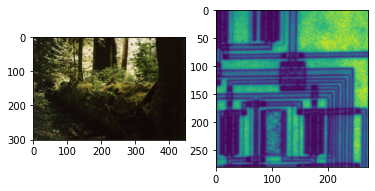

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Set_1_raw_images ))
for i in range( 0 , len( Set_1_raw_images )) :
  axs[i].imshow( Set_1_raw_images[i] )

Set 1 testing raw images.

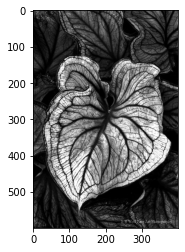

In [ ]:
%matplotlib inline
if len( Set_1_raw_test_images ) > 1:
  fig, axs = plt.subplots(1, len( Set_1_raw_test_images ))
  for i in range( 0 , len( Set_1_raw_test_images )) :
    axs[i].imshow( Set_1_raw_test_images[i], cmap = 'gray' )
else :
  plt.imshow( Set_1_raw_test_images[0], cmap = 'gray' )

Set 2

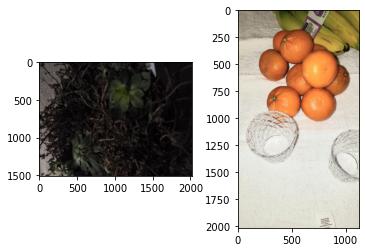

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Set_2_raw_images ))
for i in range( 0 , len( Set_2_raw_images )) :
  axs[i].imshow( Set_2_raw_images[i] )

Set 2 raw testing images

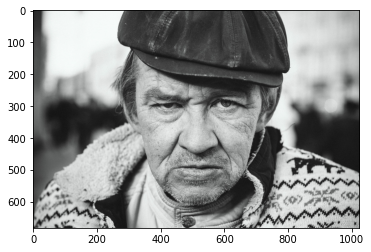

In [ ]:
%matplotlib inline
if len( Set_1_raw_test_images ) > 1:
  fig, axs = plt.subplots(1, len( Set_2_raw_test_images ))
  for i in range( 0 , len( Set_2_raw_test_images )) :
    axs[i].imshow( Set_2_raw_test_images[i], cmap = 'gray' )
else :
  plt.imshow( Set_2_raw_test_images[0], cmap = 'gray' )

# Data Discovery

In [ ]:
for i in range( 0 , len( Set_1_raw_images )) :
  print(Set_1_raw_images[i].shape)

(301, 447, 4)
(280, 272)


In [ ]:
for i in range( 0 , len( Set_1_raw_test_images )) :
  print(Set_1_raw_test_images[i].shape)

(600, 400)


In [ ]:
for i in range( 0 , len( Set_2_raw_images )) :
  print(Set_2_raw_images[i].shape)

(1512, 2016, 3)
(2016, 1123, 3)


In [ ]:
for i in range( 0 , len( Set_2_raw_test_images )) :
  print(Set_2_raw_test_images[i].shape)

(683, 1024, 3)


# Converting to gray scale

Set 1

In [ ]:
Set_1_gray_images = []

for i in range( 0 , len( Set_1_raw_images )) :
  if len( Set_1_raw_images[i].shape ) > 2 :
    Set_1_gray_images.append( RGB_to_Greyscale( Set_1_raw_images[i] ) )
  else :
    Set_1_gray_images.append( Set_1_raw_images[i] )

Set_1_gray_test_images = []
for i in range( 0 , len( Set_1_raw_test_images )) :
  if len( Set_1_raw_test_images[i].shape ) > 2 :
    Set_1_gray_test_images.append( RGB_to_Greyscale( Set_1_raw_test_images[i] ) )
  else :
    Set_1_gray_test_images.append( Set_1_raw_test_images[i] )

Set 2

In [ ]:
Set_2_gray_images = []

for i in range( 0 , len( Set_2_raw_images )) :
  if len( Set_2_raw_images[i].shape ) > 2 :
    Set_2_gray_images.append( RGB_to_Greyscale( Set_2_raw_images[i] ) )
  else :
    Set_2_gray_images.append( Set_2_raw_images[i] )

Set_2_gray_test_images = []
for i in range( 0 , len( Set_2_raw_test_images )) :
  if len( Set_2_raw_test_images[i].shape ) > 2 :
    Set_2_gray_test_images.append( RGB_to_Greyscale( Set_2_raw_test_images[i] ) )
  else :
    Set_2_gray_test_images.append( Set_2_raw_test_images[i] )

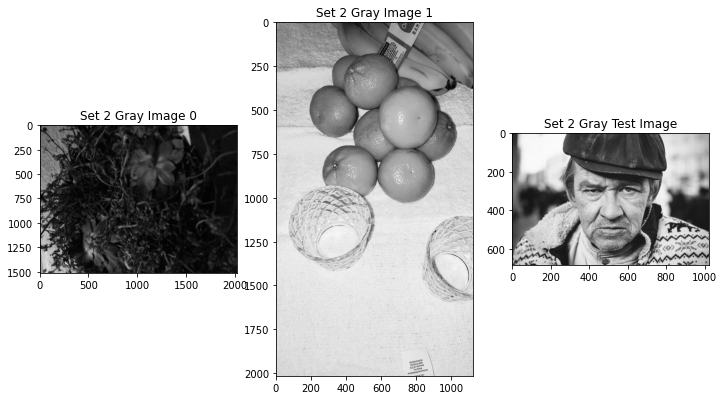

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Set_2_gray_images ) + len( Set_2_gray_test_images ), figsize=(12, 12))
for i in range( 0 , len( Set_2_gray_images )) :
  axs[i].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i].set_title('Set 2 Gray Image ' + str(i) )

if len( Set_2_gray_test_images ) > 1:
  for i in range( 0 , len( Set_2_gray_test_images )) :
    axs[len( Set_2_gray_images ) + i].imshow( Set_2_gray_test_images[i], cmap = 'gray' )
    axs[i].set_title('Set 2 Gray Test Image ' + str(i) )
else :
  axs[len( Set_2_gray_images )].imshow( Set_2_gray_test_images[0], cmap = 'gray' )
  axs[len( Set_2_gray_images )].set_title('Set 2 Gray Test Image')

# Initializing Histograms

In [ ]:
Set_1_histograms = []

for i in range( 0 , len( Set_1_gray_images )) :
  Set_1_histograms.append( generate_histogram( Set_1_gray_images[i] ) )

Set_1_test_histograms = []
for i in range( 0 , len( Set_1_raw_test_images )) :
  Set_1_test_histograms.append( generate_histogram( Set_1_gray_test_images[i] ) )
  

In [ ]:
Set_2_histograms = []

for i in range( 0 , len( Set_2_gray_images )) :
  Set_2_histograms.append( generate_histogram( Set_2_gray_images[i] ) )

Set_2_test_histograms = []
for i in range( 0 , len( Set_2_raw_test_images )) :
  Set_2_test_histograms.append( generate_histogram( Set_2_gray_test_images[i] ) )

Displaying Histograms

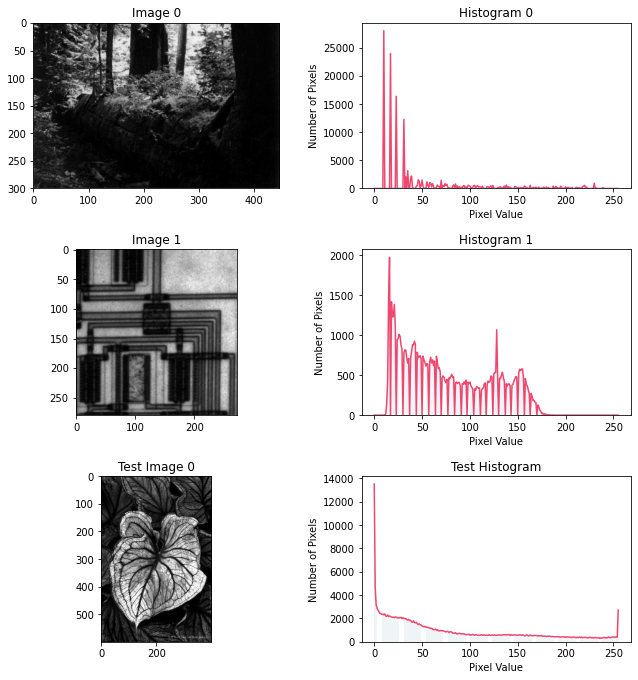

In [ ]:
color_1 = "#ef476f"
color_2 = "#EFF5F7"

%matplotlib inline
fig, axs = plt.subplots( len( Set_1_histograms ) + len( Set_1_test_histograms ) ,
                        2 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_1_histograms ) ) :
  axs[i , 0].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 1].plot(Set_1_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_1_histograms[i])), Set_1_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Number of Pixels')
  axs[i, 1].set_title('Histogram ' + str(i))

if len( Set_1_test_histograms ) > 1:
  for i in range( 0 , len( Set_1_test_histograms )) :
    axs[ len( Set_1_histograms ) + i , 0].imshow( Set_1_gray_test_images[i] , cmap = 'gray' )
    axs[ len( Set_1_histograms ) + i, 0].set_title('Test Image ' + str(i))

    axs[ len( Set_1_histograms ) + i , 1].plot(Set_1_test_histograms[i], color=color_1)
    axs[ len( Set_1_histograms ) + i , 1].bar(np.arange(len(Set_1_test_histograms[i])), Set_1_test_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_1_histograms ) + i, 1], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_1_histograms ) + i, 1], ylabel='Number of Pixels')
    axs[ len( Set_1_histograms ) + i, 1].set_title('Test Histogram ' + str(i))
else :
  axs[ len( Set_1_histograms ), 0].imshow( Set_1_gray_test_images[0], cmap = 'gray')
  axs[ len( Set_1_histograms ), 0].set_title('Test Image ' + str(0))
  axs[ len( Set_1_histograms ) , 1].plot(Set_1_test_histograms[0], color=color_1)
  axs[ len( Set_1_histograms ) , 1].bar(np.arange(len(Set_1_test_histograms[0])), Set_1_test_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_1_histograms ), 1], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_1_histograms ), 1], ylabel='Number of Pixels')
  axs[ len( Set_1_histograms ) , 1].set_title('Test Histogram')

Set 2

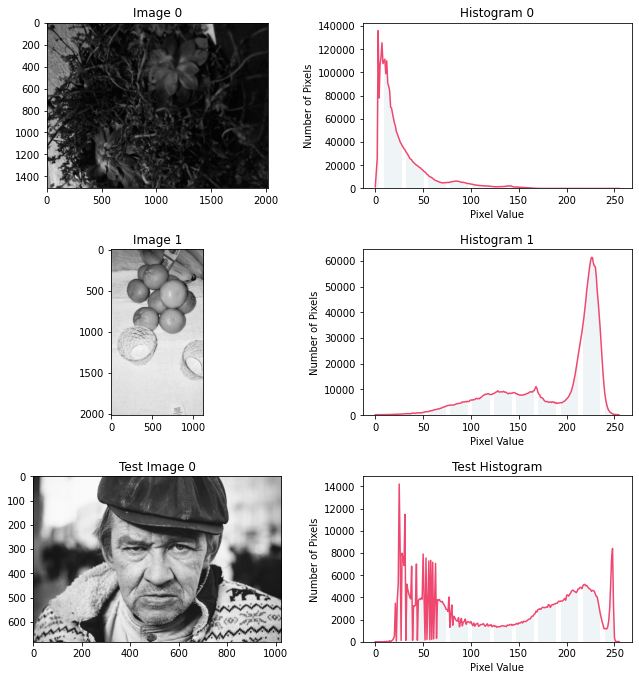

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_histograms ) + len( Set_2_test_histograms ) ,
                        2 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_histograms ) ) :
  axs[i , 0].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 1].plot(Set_2_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_2_histograms[i])), Set_2_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Number of Pixels')
  axs[i, 1].set_title('Histogram ' + str(i))

if len( Set_2_test_histograms ) > 1:
  for i in range( 0 , len( Set_2_test_histograms )) :
    axs[ len( Set_2_histograms ) + i , 0].imshow( Set_2_gray_test_images[i] , cmap = 'gray' )
    axs[ len( Set_2_histograms ) + i, 0].set_title('Test Image ' + str(i))

    axs[ len( Set_2_histograms ) + i , 1].plot(Set_2_test_histograms[i], color=color_1)
    axs[ len( Set_2_histograms ) + i , 1].bar(np.arange(len(Set_2_test_histograms[i])), Set_2_test_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_2_histograms ) + i, 1], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_2_histograms ) + i, 1], ylabel='Number of Pixels')
    axs[ len( Set_2_histograms ) + i, 1].set_title('Test Histogram ' + str(i))
else :
  axs[ len( Set_2_histograms ), 0].imshow( Set_2_gray_test_images[0], cmap = 'gray')
  axs[ len( Set_2_histograms ), 0].set_title('Test Image ' + str(0))
  axs[ len( Set_2_histograms ) , 1].plot(Set_2_test_histograms[0], color=color_1)
  axs[ len( Set_2_histograms ) , 1].bar(np.arange(len(Set_2_test_histograms[0])), Set_2_test_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_2_histograms ), 1], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_2_histograms ), 1], ylabel='Number of Pixels')
  axs[ len( Set_2_histograms ) , 1].set_title('Test Histogram')

# Converting to Normalized Histograms

In [ ]:
Set_1_norm_histograms = []

for i in range( 0 , len( Set_1_histograms )) :
  Set_1_norm_histograms.append( normalize_histogram( Set_1_histograms[i] ) )

Set_1_test_norm_histograms = []
for i in range( 0 , len( Set_1_test_histograms )) :
  Set_1_test_norm_histograms.append( normalize_histogram( Set_1_test_histograms[i] ) )

In [ ]:
Set_2_norm_histograms = []

for i in range( 0 , len( Set_2_histograms )) :
  Set_2_norm_histograms.append( normalize_histogram( Set_2_histograms[i] ) )

Set_2_test_norm_histograms = []
for i in range( 0 , len( Set_2_test_histograms )) :
  Set_2_test_norm_histograms.append( normalize_histogram( Set_2_test_histograms[i] ) )

Display images

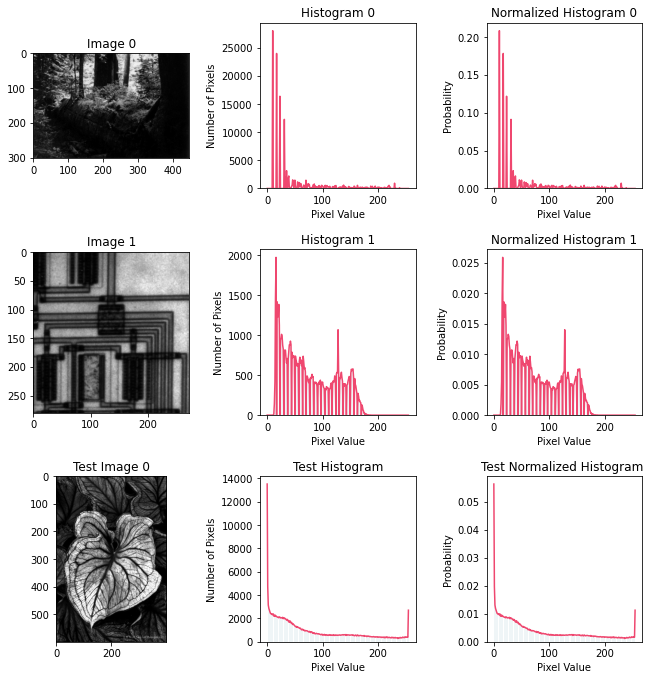

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_1_histograms ) + len( Set_1_test_histograms ) ,
                        3 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_1_histograms ) ) :
  axs[i , 0].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 1].plot(Set_1_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_1_histograms[i])), Set_1_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Number of Pixels')
  axs[i, 1].set_title('Histogram ' + str(i))

  axs[i , 2].plot(Set_1_norm_histograms[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_1_norm_histograms[i])), Set_1_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='Probability')
  axs[i, 2].set_title('Normalized Histogram ' + str(i))

if len( Set_1_test_histograms ) > 1:
  for i in range( 0 , len( Set_1_test_histograms )) :
    axs[ len( Set_1_histograms ) + i , 0].imshow( Set_1_gray_test_images[i] , cmap = 'gray' )
    axs[ len( Set_1_histograms ) + i, 0].set_title('Test Image ' + str(i))

    axs[ len( Set_1_histograms ) + i , 1].plot(Set_1_test_histograms[i], color=color_1)
    axs[ len( Set_1_histograms ) + i , 1].bar(np.arange(len(Set_1_test_histograms[i])), Set_1_test_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_1_histograms ) + i, 1], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_1_histograms ) + i, 1], ylabel='Number of Pixels')
    axs[ len( Set_1_histograms ) + i, 1].set_title('Test Histogram ' + str(i))

    axs[ len( Set_1_histograms ) + i , 2].plot(Set_1_test_norm_histograms[i], color=color_1)
    axs[ len( Set_1_histograms ) + i , 2].bar(np.arange(len(Set_1_test_norm_histograms[i])), Set_1_test_norm_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_1_histograms ) + i, 2], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_1_histograms ) + i, 2], ylabel='Probability')
    axs[ len( Set_1_histograms ) + i, 2].set_title('Test Normalized Histogram ' + str(i))
else :
  axs[ len( Set_1_histograms ), 0].imshow( Set_1_gray_test_images[0], cmap = 'gray')
  axs[ len( Set_1_histograms ), 0].set_title('Test Image ' + str(0))
  axs[ len( Set_1_histograms ) , 1].plot(Set_1_test_histograms[0], color=color_1)
  axs[ len( Set_1_histograms ) , 1].bar(np.arange(len(Set_1_test_histograms[0])), Set_1_test_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_1_histograms ), 1], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_1_histograms ), 1], ylabel='Number of Pixels')
  axs[ len( Set_1_histograms ) , 1].set_title('Test Histogram')

  axs[ len( Set_1_histograms ) , 2].plot(Set_1_test_norm_histograms[0], color=color_1)
  axs[ len( Set_1_histograms ) , 2].bar(np.arange(len(Set_1_test_norm_histograms[0])), Set_1_test_norm_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_1_histograms ) , 2], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_1_histograms ) , 2], ylabel='Probability')
  axs[ len( Set_1_histograms ) , 2].set_title('Test Normalized Histogram ')

Set 2

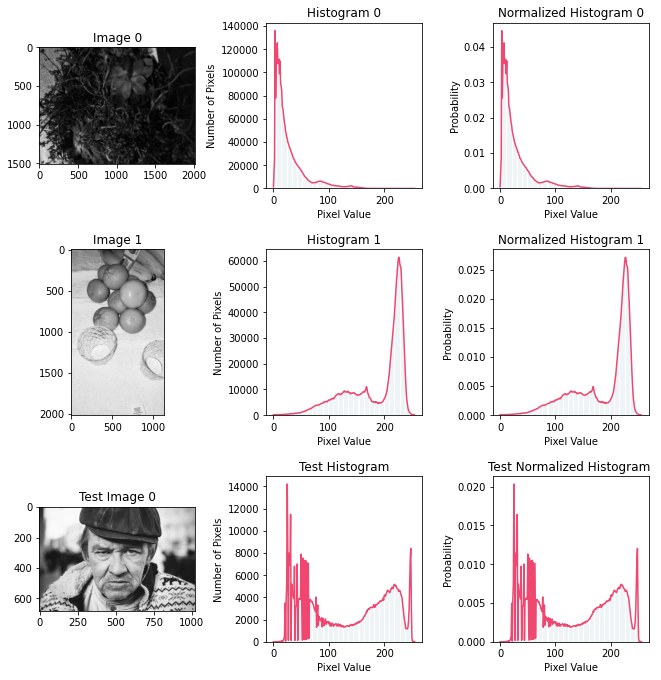

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_histograms ) + len( Set_2_test_histograms ) ,
                        3 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_histograms ) ) :
  axs[i , 0].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 1].plot(Set_2_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_2_histograms[i])), Set_2_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Number of Pixels')
  axs[i, 1].set_title('Histogram ' + str(i))

  axs[i , 2].plot(Set_2_norm_histograms[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_2_norm_histograms[i])), Set_2_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='Probability')
  axs[i, 2].set_title('Normalized Histogram ' + str(i))

if len( Set_2_test_histograms ) > 1:
  for i in range( 0 , len( Set_2_test_histograms )) :
    axs[ len( Set_2_histograms ) + i , 0].imshow( Set_2_gray_test_images[i] , cmap = 'gray' )
    axs[ len( Set_2_histograms ) + i, 0].set_title('Test Image ' + str(i))

    axs[ len( Set_2_histograms ) + i , 1].plot(Set_2_test_histograms[i], color=color_1)
    axs[ len( Set_2_histograms ) + i , 1].bar(np.arange(len(Set_2_test_histograms[i])), Set_2_test_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_2_histograms ) + i, 1], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_2_histograms ) + i, 1], ylabel='Number of Pixels')
    axs[ len( Set_2_histograms ) + i, 1].set_title('Test Histogram ' + str(i))

    axs[ len( Set_2_histograms ) + i , 2].plot(Set_2_test_norm_histograms[i], color=color_1)
    axs[ len( Set_2_histograms ) + i , 2].bar(np.arange(len(Set_2_test_norm_histograms[i])), Set_2_test_norm_histograms[i], color=color_2)
    plt.setp(axs[ len( Set_2_histograms ) + i, 2], xlabel='Pixel Value')
    plt.setp(axs[ len( Set_2_histograms ) + i, 2], ylabel='Probability')
    axs[ len( Set_2_histograms ) + i, 2].set_title('Test Normalized Histogram ' + str(i))
else :
  axs[ len( Set_2_histograms ), 0].imshow( Set_2_gray_test_images[0], cmap = 'gray')
  axs[ len( Set_2_histograms ), 0].set_title('Test Image ' + str(0))
  axs[ len( Set_2_histograms ) , 1].plot(Set_2_test_histograms[0], color=color_1)
  axs[ len( Set_2_histograms ) , 1].bar(np.arange(len(Set_2_test_histograms[0])), Set_2_test_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_2_histograms ), 1], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_2_histograms ), 1], ylabel='Number of Pixels')
  axs[ len( Set_2_histograms ) , 1].set_title('Test Histogram')

  axs[ len( Set_2_histograms ) , 2].plot(Set_2_test_norm_histograms[0], color=color_1)
  axs[ len( Set_2_histograms ) , 2].bar(np.arange(len(Set_2_test_norm_histograms[0])), Set_2_test_norm_histograms[0], color=color_2)
  plt.setp(axs[ len( Set_2_histograms ) , 2], xlabel='Pixel Value')
  plt.setp(axs[ len( Set_2_histograms ) , 2], ylabel='Probability')
  axs[ len( Set_2_histograms ) , 2].set_title('Test Normalized Histogram ')

# Comulative Distribution Function (CDF)

Set 1

In [ ]:
Set_1_CDF = []
Set_1_equalized_images = []

for i in range( 0 , len( Set_1_norm_histograms )) :
  Set_1_CDF.append( generate_CDF( Set_1_norm_histograms[i] ) )

for i in range( 0 , len( Set_1_norm_histograms )) :
  Set_1_equalized_images.append( histogram_equalization( Set_1_gray_images[i] , Set_1_CDF[i] ) )

Set_1_test_CDF = []
Set_1_equalized_test_images = []

for i in range( 0 , len( Set_1_test_norm_histograms )) :
  Set_1_test_CDF.append( generate_CDF( Set_1_test_norm_histograms[i] ) )

for i in range( 0 , len( Set_1_test_norm_histograms )) :
  Set_1_equalized_test_images.append( histogram_equalization( Set_1_gray_test_images[i] , Set_1_test_CDF[i] ) )

Set 2

In [ ]:
Set_2_CDF = []
Set_2_equalized_images = []

for i in range( 0 , len( Set_2_norm_histograms )) :
  Set_2_CDF.append( generate_CDF( Set_2_norm_histograms[i] ) )

for i in range( 0 , len( Set_2_norm_histograms )) :
  Set_2_equalized_images.append( histogram_equalization( Set_2_gray_images[i] , Set_2_CDF[i] ) )

Set_2_test_CDF = []
Set_2_equalized_test_images = []

for i in range( 0 , len( Set_2_test_norm_histograms )) :
  Set_2_test_CDF.append( generate_CDF( Set_2_test_norm_histograms[i] ) )

for i in range( 0 , len( Set_2_test_norm_histograms )) :
  Set_2_equalized_test_images.append( histogram_equalization( Set_2_gray_test_images[i] , Set_2_test_CDF[i] ) )

Text(0.5, 1.0, 'Test Normalized Histogram ')

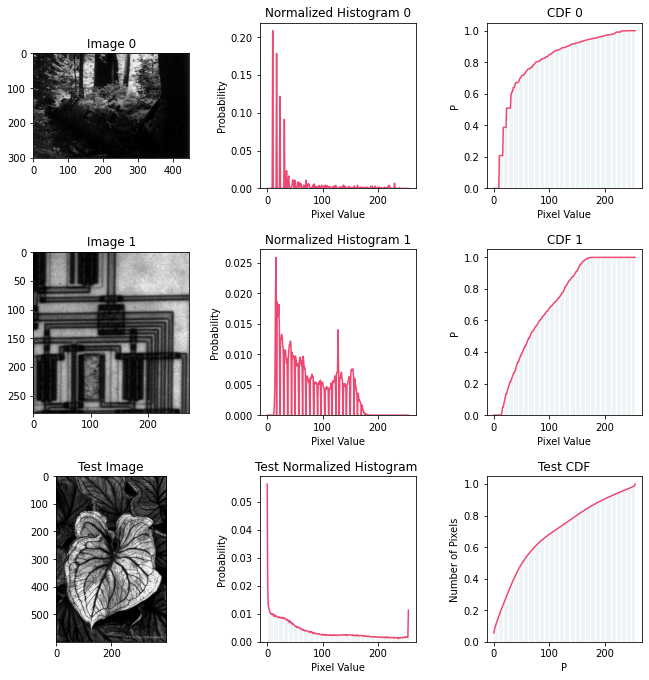

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_1_CDF ) + len( Set_1_test_CDF ) ,
                        3 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_1_CDF ) ) :
  axs[i , 0].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 2].plot(Set_1_CDF[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_1_CDF[i])), Set_1_CDF[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='P')
  axs[i, 2].set_title('CDF ' + str(i))

  axs[i , 1].plot(Set_1_norm_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_1_norm_histograms[i])), Set_1_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Probability')
  axs[i, 1].set_title('Normalized Histogram ' + str(i))

  #axs[i , 3].imshow( Set_1_equalized_images[i], cmap = 'gray' )
  #axs[i, 3].set_title('Equilized Image ' + str(i))

axs[ len( Set_1_CDF ), 0].imshow( Set_1_gray_test_images[0], cmap = 'gray')
axs[ len( Set_1_CDF ), 0].set_title('Test Image')
axs[ len( Set_1_CDF ) , 2].plot(Set_1_test_CDF[0], color=color_1)
axs[ len( Set_1_CDF ) , 2].bar(np.arange(len(Set_1_test_CDF[0])), Set_1_test_CDF[0], color=color_2)
plt.setp(axs[ len( Set_1_CDF ), 2], xlabel='P')
plt.setp(axs[ len( Set_1_CDF ), 2], ylabel='Number of Pixels')
axs[ len( Set_1_CDF ) , 2].set_title('Test CDF')

#axs[len( Set_1_equalized_images ) , 3].imshow( Set_1_equalized_test_images[0], cmap = 'gray' )
#axs[len( Set_1_equalized_images ), 3].set_title('Equilized Test Image ')

axs[ len( Set_1_CDF ) , 1].plot(Set_1_test_norm_histograms[0], color=color_1)
axs[ len( Set_1_CDF ) , 1].bar(np.arange(len(Set_1_test_norm_histograms[0])), Set_1_test_norm_histograms[0], color=color_2)
plt.setp(axs[ len( Set_1_CDF ) , 1], xlabel='Pixel Value')
plt.setp(axs[ len( Set_1_CDF ) , 1], ylabel='Probability')
axs[ len( Set_1_CDF ) , 1].set_title('Test Normalized Histogram ')

Image comparison

Text(0.5, 1.0, 'Equalized Image 0')

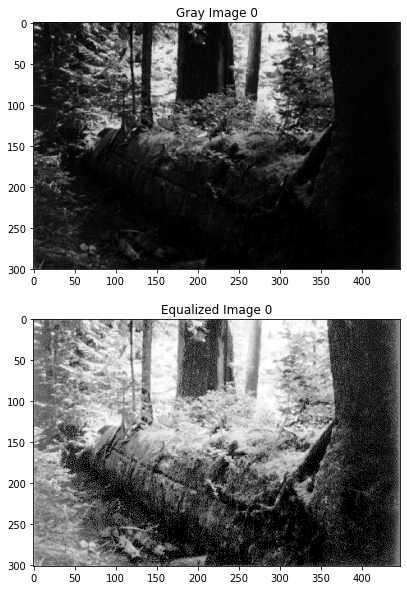

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( 2 , 1, figsize=(10, 10) , )
axs[0].imshow( Set_1_gray_images[0], cmap = 'gray' )
axs[0].set_title('Gray Image 0')

axs[1].imshow( Set_1_equalized_images[0], cmap = 'gray' )
axs[1].set_title('Equalized Image 0')

Text(0.5, 1.0, 'Equalized Image 1')

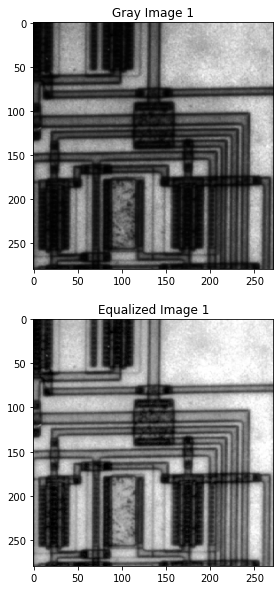

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( 2 , 1, figsize=(10, 10) , )
axs[0].imshow( Set_1_gray_images[1], cmap = 'gray' )
axs[0].set_title('Gray Image 1')

axs[1].imshow( Set_1_equalized_images[1], cmap = 'gray' )
axs[1].set_title('Equalized Image 1')

Text(0.5, 1.0, 'Equalized Test Image')

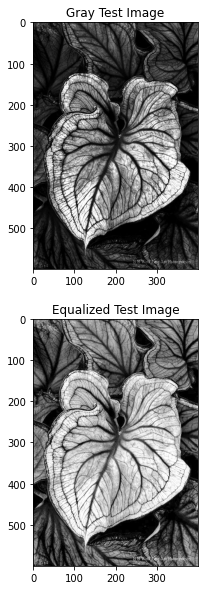

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( 2 , 1, figsize=(10, 10) , )
axs[0].imshow( Set_1_gray_test_images[0], cmap = 'gray' )
axs[0].set_title('Gray Test Image')

axs[1].imshow( Set_1_equalized_test_images[0], cmap = 'gray' )
axs[1].set_title('Equalized Test Image')

Text(0.5, 1.0, 'Equalized Test Image ')

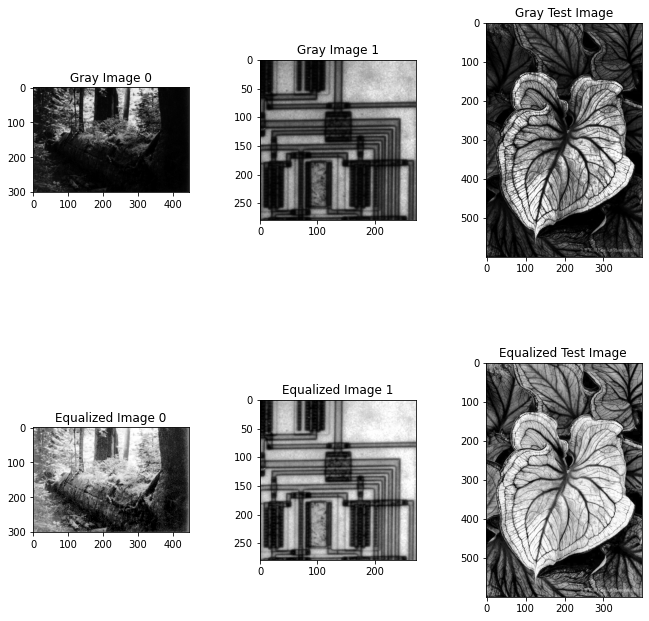

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( 2 ,
                        len( Set_1_CDF ) + len( Set_1_test_CDF ) , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_1_CDF ) ) :
  axs[0 , i].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[0, i].set_title('Gray Image ' + str(i))

  axs[1 , i].imshow( Set_1_equalized_images[i], cmap = 'gray' )
  axs[1, i].set_title('Equalized Image ' + str(i))

axs[ 0, len( Set_1_CDF )].imshow( Set_1_gray_test_images[0], cmap = 'gray')
axs[ 0, len( Set_1_CDF )].set_title('Gray Test Image')

axs[1 , len( Set_1_equalized_images )].imshow( Set_1_equalized_test_images[0], cmap = 'gray' )
axs[1, len( Set_1_equalized_images )].set_title('Equalized Test Image ')

Text(0.5, 1.0, 'Equalized Test Image ')

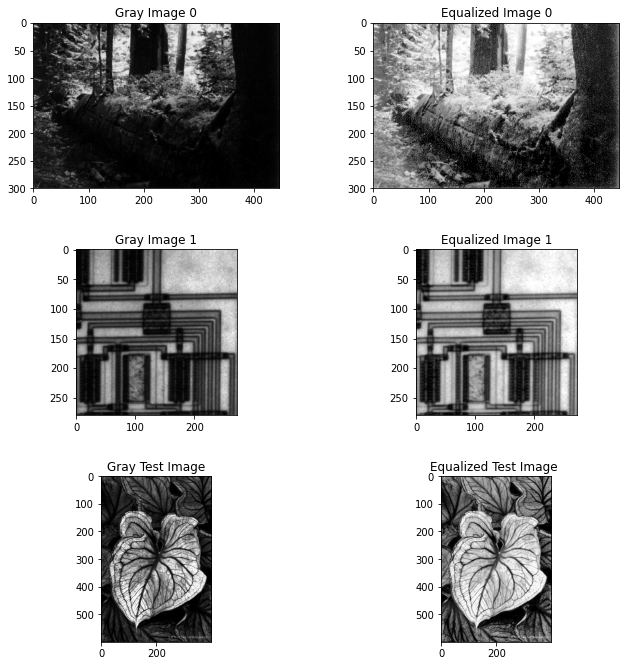

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_1_CDF ) + len( Set_1_test_CDF ) ,
                        2 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_1_CDF ) ) :
  axs[i , 0].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Gray Image ' + str(i))

  axs[i , 1].imshow( Set_1_equalized_images[i], cmap = 'gray' )
  axs[i, 1].set_title('Equalized Image ' + str(i))

axs[ len( Set_1_CDF ), 0].imshow( Set_1_gray_test_images[0], cmap = 'gray')
axs[ len( Set_1_CDF ), 0].set_title('Gray Test Image')

axs[len( Set_1_equalized_images ) , 1].imshow( Set_1_equalized_test_images[0], cmap = 'gray' )
axs[len( Set_1_equalized_images ), 1].set_title('Equalized Test Image ')

Set 2

Text(0.5, 1.0, 'Test Normalized Histogram ')

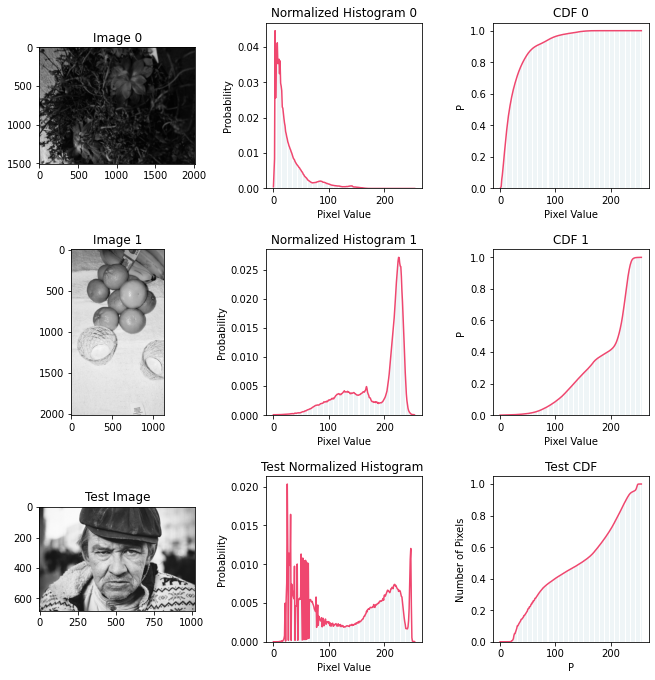

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_CDF ) + len( Set_2_test_CDF ) ,
                        3 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_CDF ) ) :
  axs[i , 0].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 2].plot(Set_2_CDF[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_2_CDF[i])), Set_2_CDF[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='P')
  axs[i, 2].set_title('CDF ' + str(i))

  axs[i , 1].plot(Set_2_norm_histograms[i], color=color_1)
  axs[i , 1].bar(np.arange(len(Set_2_norm_histograms[i])), Set_2_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Probability')
  axs[i, 1].set_title('Normalized Histogram ' + str(i))

  #axs[i , 3].imshow( Set_2_equalized_images[i], cmap = 'gray' )
  #axs[i, 3].set_title('Equalized Image ' + str(i))

axs[ len( Set_2_CDF ), 0].imshow( Set_2_gray_test_images[0], cmap = 'gray')
axs[ len( Set_2_CDF ), 0].set_title('Test Image')
axs[ len( Set_2_CDF ) , 2].plot(Set_2_test_CDF[0], color=color_1)
axs[ len( Set_2_CDF ) , 2].bar(np.arange(len(Set_2_test_CDF[0])), Set_2_test_CDF[0], color=color_2)
plt.setp(axs[ len( Set_2_CDF ), 2], xlabel='P')
plt.setp(axs[ len( Set_2_CDF ), 2], ylabel='Number of Pixels')
axs[ len( Set_2_CDF ) , 2].set_title('Test CDF')

#axs[len( Set_2_equalized_images ) , 3].imshow( Set_2_equalized_test_images[0], cmap = 'gray' )
#axs[len( Set_2_equalized_images ), 3].set_title('Equalized Test Image ')

axs[ len( Set_2_CDF ) , 1].plot(Set_2_test_norm_histograms[0], color=color_1)
axs[ len( Set_2_CDF ) , 1].bar(np.arange(len(Set_2_test_norm_histograms[0])), Set_2_test_norm_histograms[0], color=color_2)
plt.setp(axs[ len( Set_2_CDF ) , 1], xlabel='Pixel Value')
plt.setp(axs[ len( Set_2_CDF ) , 1], ylabel='Probability')
axs[ len( Set_2_CDF ) , 1].set_title('Test Normalized Histogram ')

Text(0.5, 1.0, 'Equilized Test Image ')

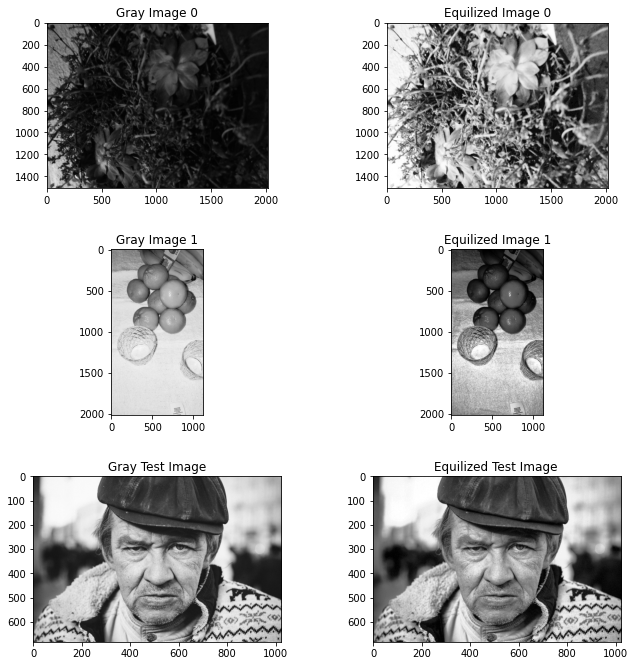

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_CDF ) + len( Set_2_test_CDF ) ,
                        2 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_CDF ) ) :
  axs[i , 0].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Gray Image ' + str(i))

  axs[i , 1].imshow( Set_2_equalized_images[i], cmap = 'gray' )
  axs[i, 1].set_title('Equilized Image ' + str(i))

axs[ len( Set_2_CDF ), 0].imshow( Set_2_gray_test_images[0], cmap = 'gray')
axs[ len( Set_2_CDF ), 0].set_title('Gray Test Image')

axs[len( Set_2_equalized_images ) , 1].imshow( Set_2_equalized_test_images[0], cmap = 'gray' )
axs[len( Set_2_equalized_images ), 1].set_title('Equilized Test Image ')

# Histogram Matching

In [ ]:
Set_1_matched_images = []
Set_1_matched_histogram = []

for i in range( 0 , len( Set_1_norm_histograms ) ) :
  Set_1_matched_images.append( histogram_matching( Set_1_gray_images[i], Set_1_norm_histograms[i], Set_1_test_norm_histograms[0] ) )
  Set_1_matched_histogram.append( normalize_histogram( generate_histogram( Set_1_matched_images[-1] ) ) )



In [ ]:
Set_2_matched_images = []
Set_2_matched_histogram = []

for i in range( 0 , len( Set_2_norm_histograms ) ) :
  Set_2_matched_images.append( histogram_matching( Set_2_gray_images[i], Set_2_norm_histograms[i], Set_2_test_norm_histograms[0] ) )
  Set_2_matched_histogram.append( normalize_histogram( generate_histogram( Set_2_matched_images[-1] ) ) )

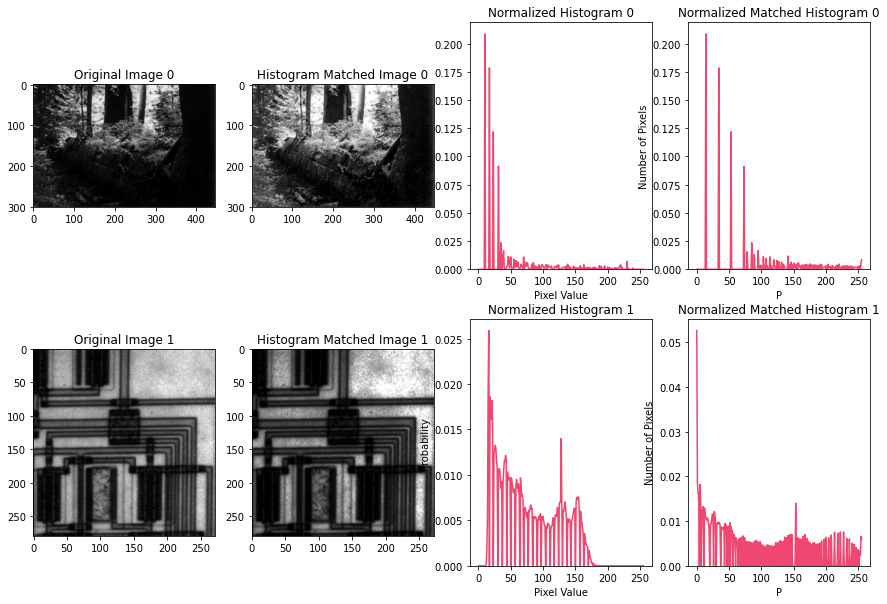

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_1_histograms ) ,
                        4  , figsize=(15, 10), )
for i in range( 0 , len( Set_1_histograms ) ) :
  axs[i , 0].imshow( Set_1_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Original Image ' + str(i) )

  axs[i , 3].plot(Set_1_matched_histogram[i] , color=color_1)
  axs[i , 3].bar(np.arange(len(Set_1_matched_histogram[i])), Set_1_matched_histogram[i], color=color_2)
  plt.setp(axs[i, 3], xlabel='P')
  plt.setp(axs[i, 3], ylabel='Number of Pixels')
  axs[i, 3].set_title('Normalized Matched Histogram ' + str(i))

  axs[i , 2].plot(Set_1_norm_histograms[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_1_norm_histograms[i])), Set_1_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='Probability')
  axs[i, 2].set_title('Normalized Histogram ' + str(i))

  axs[i , 1].imshow( Set_1_matched_images[i], cmap = 'gray' )
  axs[i, 1].set_title('Histogram Matched Image ' + str(i) )


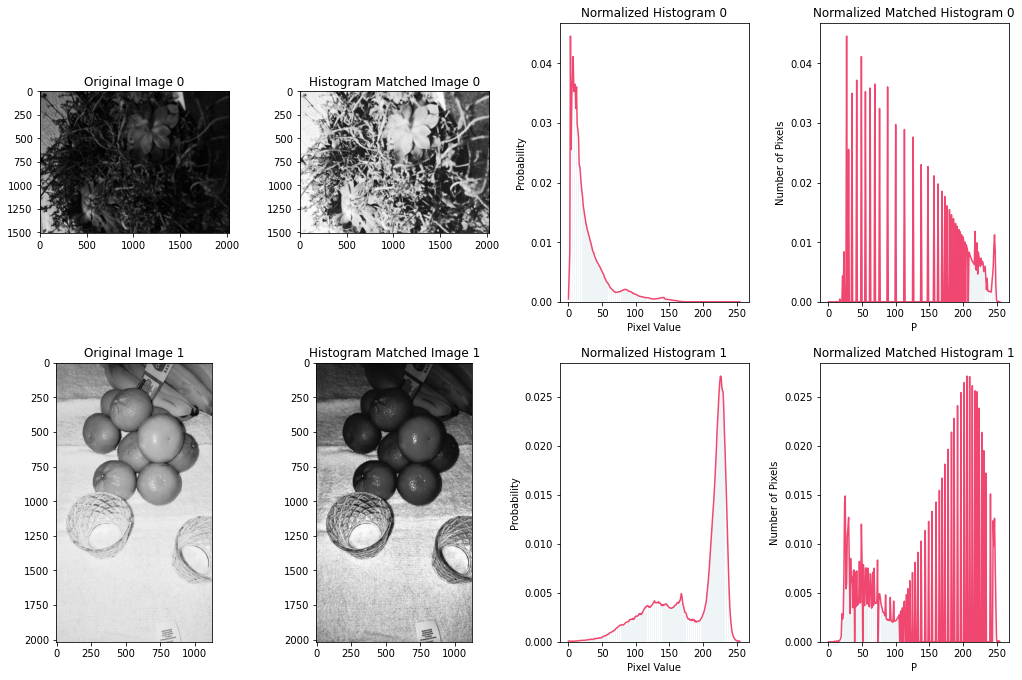

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_histograms ) ,
                        4 , figsize=(15, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_histograms ) ) :
  axs[i , 0].imshow( Set_2_gray_images[i], cmap = 'gray' )
  axs[i, 0].set_title('Original Image ' + str(i) )
  
  axs[i , 3].plot(Set_2_matched_histogram[i] , color=color_1)
  axs[i , 3].bar(np.arange(len(Set_2_matched_histogram[i])), Set_2_matched_histogram[i], color=color_2)
  plt.setp(axs[i, 3], xlabel='P')
  plt.setp(axs[i, 3], ylabel='Number of Pixels')
  axs[i, 3].set_title('Normalized Matched Histogram ' + str(i))

  axs[i , 2].plot(Set_2_norm_histograms[i], color=color_1)
  axs[i , 2].bar(np.arange(len(Set_2_norm_histograms[i])), Set_2_norm_histograms[i], color=color_2)
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='Probability')
  axs[i, 2].set_title('Normalized Histogram ' + str(i))

  axs[i , 1].imshow( Set_2_matched_images[i], cmap = 'gray' )
  axs[i, 1].set_title('Histogram Matched Image ' + str(i) )


# Color Histogram Matching

Text(0.5, 1.0, 'Target Image ')

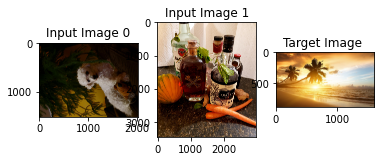

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Color_set_raw_images )+1)
for i in range(0 , len( Color_set_raw_images )) :
    axs[i].imshow( Color_set_raw_images[i] )
    axs[i].set_title('Input Image ' + str(i))

axs[len(Color_set_raw_images)].imshow( Color_set_raw_test_images[0] )
axs[len(Color_set_raw_images)].set_title('Target Image ')

In [ ]:
Color_set_raw_images[0].shape

(1512, 2016, 3)

In [ ]:
def separate_RGB_images( image1 ) :
  temp_R = np.zeros((len( image1 ), len( image1[0])), dtype= int )
  temp_G = np.zeros((len( image1 ), len( image1[0])), dtype= int  )
  temp_B = np.zeros((len( image1 ), len( image1[0])), dtype= int  )

  for j in range(0 , len( image1 ) ) :
    for k in range(0 , len( image1[j] ) ) :
      temp_R[j][k] = image1[j][k][0]
      temp_G[j][k] = image1[j][k][1]
      temp_B[j][k] = image1[j][k][2]

  return temp_R, temp_G, temp_B


In [ ]:
def combine_RGB( red_image, green_image, blue_image ) :
  temp = np.zeros( (len(red_image) , len(green_image[0]) , 3), dtype=int )

  print(temp.shape)
  for j in range(0 , len( red_image ) ) :
    for k in range(0 , len( red_image[j] ) ) :
      temp[j][k][0] = red_image[j][k]
      temp[j][k][1] = green_image[j][k]
      temp[j][k][2] = blue_image[j][k]
  
  return temp

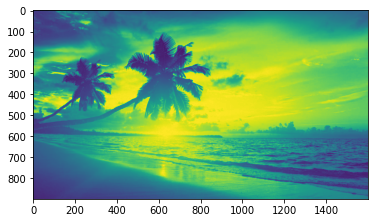

In [ ]:
plt.imshow(separate_RGB_images( Color_set_raw_test_images[0] )[1])

In [ ]:
Red_set = []
Green_set = []
Blue_set = []


Red_t_set = []
Green_t_set = []
Blue_t_set = []


for i in range(0 , len( Color_set_raw_images )) :
  Red_set.append(  separate_RGB_images(  Color_set_raw_images[i] )[0]  )
  Green_set.append(  separate_RGB_images( Color_set_raw_images[i] )[1]  )
  Blue_set.append(  separate_RGB_images( Color_set_raw_images[i] )[2]  )

for i in range(0 , len( Color_set_raw_test_images )) :
  Red_t_set.append(  separate_RGB_images( Color_set_raw_test_images[0] )[0]  )
  Green_t_set.append(  separate_RGB_images( Color_set_raw_test_images[0] )[1]  )
  Blue_t_set.append(  separate_RGB_images( Color_set_raw_test_images[0] )[2]  )



In [ ]:
Red_set_hist = []
Green_set_hist = []
Blue_set_hist = []


Red_t_set_hist = []
Green_t_set_hist = []
Blue_t_set_hist = []

for i in range(0 , len( Color_set_raw_images )) :
  Red_set_hist.append( normalize_histogram( generate_histogram( Red_set[i] ) ) )
  Green_set_hist.append( normalize_histogram( generate_histogram( Green_set[i] ) ) )
  Blue_set_hist.append( normalize_histogram( generate_histogram( Blue_set[i] ) ) )

Red_t_set_hist.append( normalize_histogram( generate_histogram( Red_t_set[0] ) ) )
Green_t_set_hist.append( normalize_histogram( generate_histogram(Green_t_set[0] ) ) )
Blue_t_set_hist.append( normalize_histogram( generate_histogram( Blue_t_set[0] ) ) )

In [ ]:
Red_set_CDF = []
Green_set_CDF = []
Blue_set_CDF = []


Red_t_set_CDF = []
Green_t_set_CDF = []
Blue_t_set_CDF = []

for i in range(0 , len( Color_set_raw_images )) :
  Red_set_CDF.append( generate_CDF( Red_set_hist[i] ) )
  Green_set_CDF.append( generate_CDF( Green_set_hist[i] ) )
  Blue_set_CDF.append( generate_CDF( Blue_set_hist[i] ) )

Red_t_set_CDF.append( generate_CDF( Red_t_set_hist[0] ) ) 
Green_t_set_CDF.append( generate_CDF( Green_t_set_hist[0] ) )
Blue_t_set_CDF.append( generate_CDF( Blue_t_set_hist[0] ) )

In [ ]:
Red_set_match = []
Green_set_match = []
Blue_set_match = []

for i in range(0 , len( Color_set_raw_images ) ) :
  Red_set_match.append( histogram_matching( Red_set[i], Red_set_hist[i], Red_t_set_hist[0] ) )
  Green_set_match.append( histogram_matching( Green_set[i], Green_set_hist[i], Green_t_set_hist[0] ) )
  Blue_set_match.append( histogram_matching( Blue_set[i], Blue_set_hist[i], Blue_t_set_hist[0] ) )



In [ ]:
Matched_images = []

for i in range(0 , len( Red_set ) ) :
  Matched_images.append( combine_RGB( Red_set_match[i], Green_set_match[i], Blue_set_match[i] ) )



(1512, 2016, 3)
(3453, 2972, 3)


In [ ]:
Red_set_hist2 = []
Green_set_hist2 = []
Blue_set_hist2 = []

for i in range(0 , len( Color_set_raw_images )) :
  Red_set_hist2.append( normalize_histogram( generate_histogram( separate_RGB_images( Matched_images[i] )[0] ) ) )
  Green_set_hist2.append( normalize_histogram( generate_histogram( separate_RGB_images( Matched_images[i] )[1] ) ) )
  Blue_set_hist2.append( normalize_histogram( generate_histogram( separate_RGB_images( Matched_images[i] )[2] ) ) )


Text(0.5, 1.0, 'Test Normalized Histogram ')

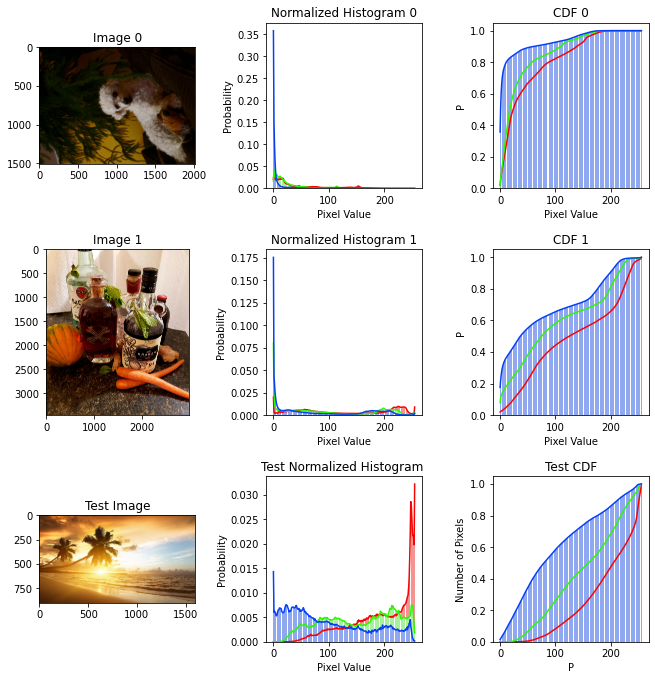

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_2_CDF ) + len( Set_2_test_CDF ) ,
                        3 , figsize=(10, 10) , )
fig.tight_layout(pad=4.0)
for i in range( 0 , len( Set_2_CDF ) ) :
  axs[i , 0].imshow( Color_set_raw_images[i])
  axs[i, 0].set_title('Image ' + str(i))

  axs[i , 2].plot(Red_set_CDF[i], color='#F90404')
  axs[i , 2].bar(np.arange(len(Red_set_CDF[i])), Red_set_CDF[i], color='#F79292')

  axs[i , 2].plot(Green_set_CDF[i], color='#2DF609')
  axs[i , 2].bar(np.arange(len(Green_set_CDF[i])), Green_set_CDF[i], color='#A8F19B')

  axs[i , 2].plot(Blue_set_CDF[i], color='#0640F4')
  axs[i , 2].bar(np.arange(len(Blue_set_CDF[i])), Blue_set_CDF[i], color='#90A8F0')

  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='P')
  axs[i, 2].set_title('CDF ' + str(i))

  axs[i , 1].plot(Red_set_hist[i], color='#F90404')
  axs[i , 1].bar(np.arange(len(Red_set_hist[i])), Red_set_hist[i], color='#F79292')

  axs[i , 1].plot(Green_set_hist[i], color='#2DF609')
  axs[i , 1].bar(np.arange(len(Green_set_hist[i])), Green_set_hist[i], color='#A8F19B')

  axs[i , 1].plot(Blue_set_hist[i], color='#0640F4')
  axs[i , 1].bar(np.arange(len(Blue_set_hist[i])), Blue_set_hist[i], color='#90A8F0')
  plt.setp(axs[i, 1], xlabel='Pixel Value')
  plt.setp(axs[i, 1], ylabel='Probability')
  axs[i, 1].set_title('Normalized Histogram ' + str(i))

axs[ len( Set_2_CDF ), 0].imshow( Color_set_raw_test_images[0])
axs[ len( Set_2_CDF ), 0].set_title('Test Image')


axs[len( Set_2_CDF ) , 2].plot(Red_t_set_CDF[0], color='#F90404')
axs[len( Set_2_CDF ) , 2].bar(np.arange(len(Red_t_set_CDF[0])), Red_t_set_CDF[0], color='#F79292')

axs[len( Set_2_CDF ) , 2].plot(Green_t_set_CDF[0], color='#2DF609')
axs[len( Set_2_CDF ) , 2].bar(np.arange(len(Green_t_set_CDF[0])), Green_t_set_CDF[0], color='#A8F19B')

axs[len( Set_2_CDF ) , 2].plot(Blue_t_set_CDF[0], color='#0640F4')
axs[len( Set_2_CDF ) , 2].bar(np.arange(len(Blue_t_set_CDF[0])), Blue_t_set_CDF[0], color='#90A8F0')
plt.setp(axs[ len( Set_2_CDF ), 2], xlabel='P')
plt.setp(axs[ len( Set_2_CDF ), 2], ylabel='Number of Pixels')
axs[ len( Set_2_CDF ) , 2].set_title('Test CDF')

axs[len( Set_2_CDF ) , 1].plot(Red_t_set_hist[0], color='#F90404')
axs[len( Set_2_CDF ) , 1].bar(np.arange(len(Red_t_set_hist[0])), Red_t_set_hist[0], color='#F79292')

axs[len( Set_2_CDF ) , 1].plot(Green_t_set_hist[0], color='#2DF609')
axs[len( Set_2_CDF ) , 1].bar(np.arange(len(Green_t_set_hist[0])), Green_t_set_hist[0], color='#A8F19B')

axs[len( Set_2_CDF ) , 1].plot(Blue_t_set_hist[0], color='#0640F4')
axs[len( Set_2_CDF ) , 1].bar(np.arange(len(Blue_t_set_hist[0])), Blue_t_set_hist[0], color='#90A8F0')

plt.setp(axs[ len( Set_2_CDF ) , 1], xlabel='Pixel Value')
plt.setp(axs[ len( Set_2_CDF ) , 1], ylabel='Probability')
axs[ len( Set_2_CDF ) , 1].set_title('Test Normalized Histogram ')

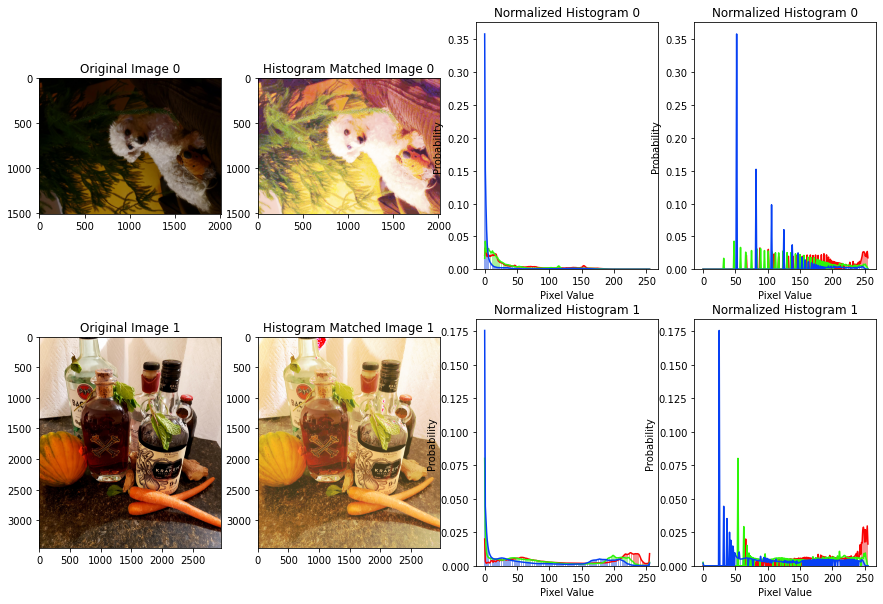

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( Set_1_histograms ) ,
                        4  , figsize=(15, 10), )
for i in range( 0 , len( Set_1_histograms ) ) :
#
  axs[i , 0].imshow( Color_set_raw_images[i] )
  axs[i, 0].set_title('Original Image ' + str(i) )
#

  axs[i , 3].plot(Red_set_hist2[i], color='#F90404')
  axs[i , 3].bar(np.arange(len(Red_set_hist2[i])), Red_set_hist2[i], color='#F79292')

  axs[i , 3].plot(Green_set_hist2[i], color='#2DF609')
  axs[i , 3].bar(np.arange(len(Green_set_hist2[i])), Green_set_hist2[i], color='#A8F19B')

  axs[i , 3].plot(Blue_set_hist2[i], color='#0640F4')
  axs[i , 3].bar(np.arange(len(Blue_set_hist2[i])), Blue_set_hist2[i], color='#90A8F0')
  plt.setp(axs[i, 3], xlabel='Pixel Value')
  plt.setp(axs[i, 3], ylabel='Probability')
  axs[i, 3].set_title('Normalized Histogram ' + str(i))

#
  axs[i , 2].plot(Red_set_hist[i], color='#F90404')
  axs[i , 2].bar(np.arange(len(Red_set_hist[i])), Red_set_hist[i], color='#F79292')

  axs[i , 2].plot(Green_set_hist[i], color='#2DF609')
  axs[i , 2].bar(np.arange(len(Green_set_hist[i])), Green_set_hist[i], color='#A8F19B')

  axs[i , 2].plot(Blue_set_hist[i], color='#0640F4')
  axs[i , 2].bar(np.arange(len(Blue_set_hist[i])), Blue_set_hist[i], color='#90A8F0')
  plt.setp(axs[i, 2], xlabel='Pixel Value')
  plt.setp(axs[i, 2], ylabel='Probability')
  axs[i, 2].set_title('Normalized Histogram ' + str(i))

#
  axs[i , 1].imshow( Matched_images[i] )
  axs[i, 1].set_title('Histogram Matched Image ' + str(i) )
#

# Image Comparison

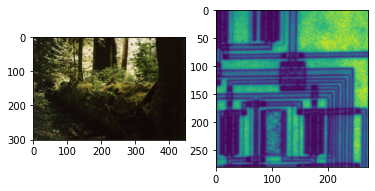

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Set_1_raw_images ))
for i in range( 0 , len( Set_1_raw_images )) :
  axs[i].imshow( Set_1_raw_images[i] )

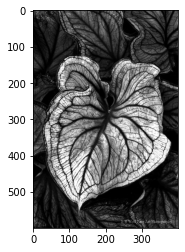

In [ ]:
%matplotlib inline
if len( Set_1_raw_test_images ) > 1:
  fig, axs = plt.subplots(1, len( Set_1_raw_test_images ))
  for i in range( 0 , len( Set_1_raw_test_images )) :
    axs[i].imshow( Set_1_raw_test_images[i], cmap = 'gray' )
else :
  plt.imshow( Set_1_raw_test_images[0], cmap = 'gray' )

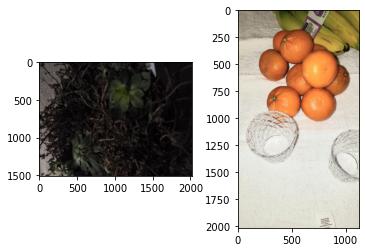

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Set_2_raw_images ))
for i in range( 0 , len( Set_2_raw_images )) :
  axs[i].imshow( Set_2_raw_images[i] )

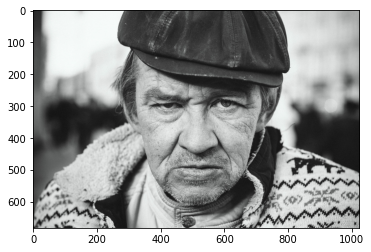

In [ ]:
%matplotlib inline
if len( Set_1_raw_test_images ) > 1:
  fig, axs = plt.subplots(1, len( Set_2_raw_test_images ))
  for i in range( 0 , len( Set_2_raw_test_images )) :
    axs[i].imshow( Set_2_raw_test_images[i], cmap = 'gray' )
else :
  plt.imshow( Set_2_raw_test_images[0], cmap = 'gray' )

In [ ]:
image_path = 'drive/MyDrive/The-famous-Lena-image-often-used-as-an-example-in-image-processing.png'
lena =  mp.imread(image_path)

lena.shape

(512, 512, 4)

In [ ]:
gray_Lena = np.zeros( (512, 512) , dtype = int )


for i in range( 0 , 512 ) :
  for j in range( 0 , 512) :

    gray_Lena[i][j] = lena[i][j][0]*255

In [ ]:
gray_Lena

array([[140, 140, 140, ...,  90,  90,  90],
       [140, 140, 140, ...,  90,  90,  90],
       [135, 135, 143, ...,  90,  90,  90],
       ...,
       [109, 109, 113, ...,  24,  24,  24],
       [106, 106, 110, ...,  23,  23,  23],
       [106, 106, 110, ...,  23,  23,  23]])

In [ ]:
lena_histogram = generate_histogram( gray_Lena )

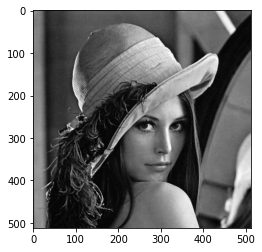

In [ ]:
plt.imshow( lena, cmap = 'gray' )

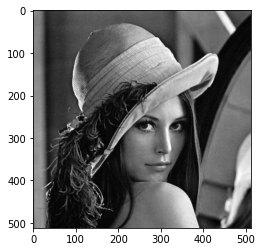

In [ ]:
plt.imshow( gray_Lena, cmap = 'gray' )

Text(0.5, 1.0, 'Histogram of Lena')

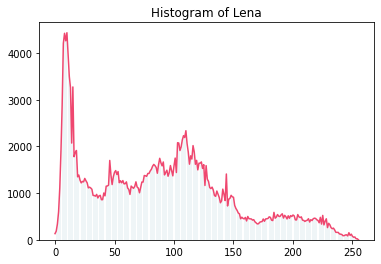

In [ ]:
plt.plot(lena_histogram , color=color_1)
plt.bar(np.arange(len(lena_histogram)), lena_histogram, color=color_2)
plt.xlabel='Intensity Value'
plt.ylabel='Number of Pixels'
plt.title('Histogram of Lena')